# Lab5: Norbert Frydrysiak
## MCMC CRR Estimation

Visualization of the tree:
[100.0]
[130.0, 80.0]
[169.00000000000003, 104.0, 64.00000000000001]
[219.70000000000002, 135.20000000000002, 83.20000000000002, 51.20000000000001]
[285.61000000000007, 175.76000000000002, 108.16000000000004, 66.56000000000002, 40.96000000000001]
[371.29300000000006, 228.48800000000006, 140.60800000000003, 86.52800000000003, 53.24800000000001, 32.76800000000001]
[482.68090000000007, 297.03440000000006, 182.7904000000001, 112.48640000000003, 69.22240000000002, 42.59840000000001, 26.21440000000001]
[627.4851700000002, 386.14472000000006, 237.6275200000001, 146.23232000000007, 89.98912000000003, 55.377920000000024, 34.07872000000001, 20.97152000000001]
[815.7307210000002, 501.98813600000017, 308.9157760000001, 190.10201600000008, 116.98585600000006, 71.99129600000002, 44.302336000000025, 27.26297600000001, 16.77721600000001]
[1060.4499373000003, 652.5845768000003, 401.5905088000002, 247.1326208000001, 152.08161280000004, 93.58868480000005, 57.59303680000003, 35.

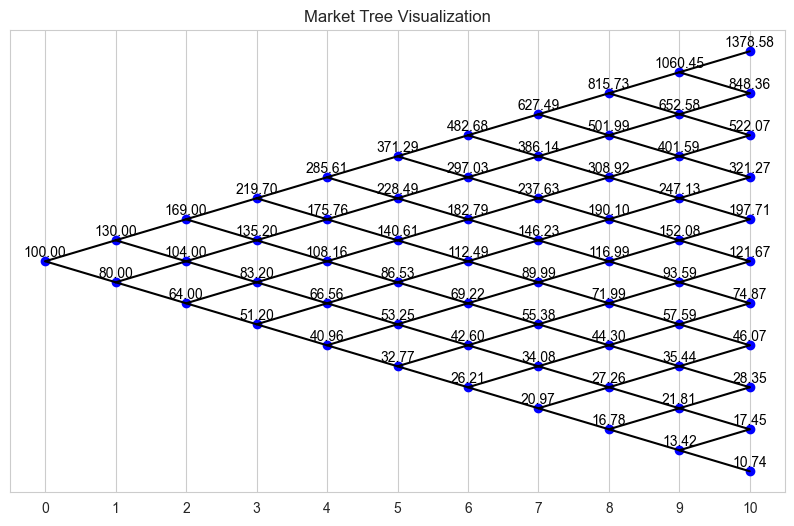

------------------

Exercises
I want to calculate the price of a call option with strike price 90
Price of the asset 66.97006486520779
Price of the asset (theoretical value)  66.97006486520779
SAME?:  True
--I want to calculate the price of max of trajectory now: 
Price of the asset 116.87742273846621

---ADDITIONAL EXAMPLE---
--I want to calculate the price of a put option with strike price 90
Price of the asset 1.6689609138656198


In [1]:
from lib.coxross import RecombiningTree, max_trajectory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

np.random.seed(42)

## 2.2.1 and 2.2.2 and 2.2.3

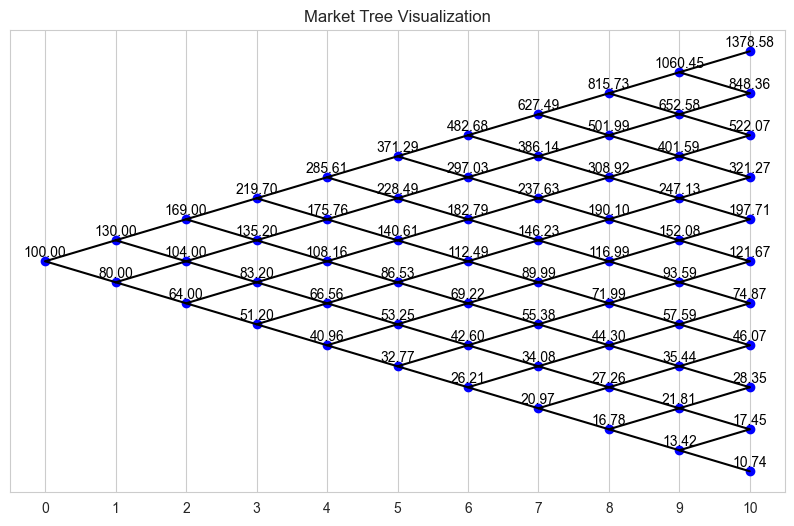

In [3]:
S0 = 100
u = 1.3
d = 0.8
steps = 10

tree = RecombiningTree(S0, u, d, steps)
tree.visualize_tree()

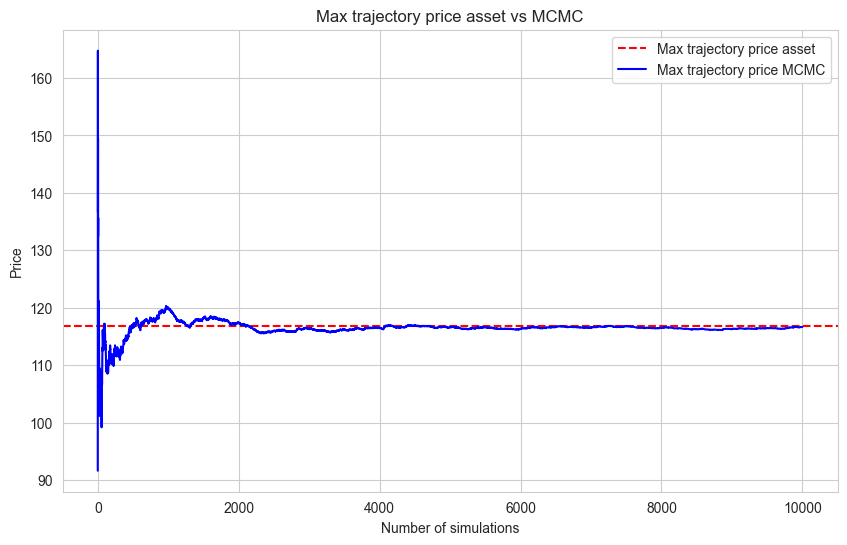

In [3]:
max_trajectory_price_asset = tree.get_price_of_asset(max_trajectory)
max_trajectory_price_mcmc = tree.get_price_of_asset_mc(func=max_trajectory, n=10000)
#plot this with red line max_trajectory_price_asset
plt.figure(figsize=(10, 6))
plt.axhline(y=max_trajectory_price_asset, color='red', linestyle='--', label='Max trajectory price asset')
plt.plot(max_trajectory_price_mcmc, label='Max trajectory price MCMC', color='blue')
plt.title('Max trajectory price asset vs MCMC')
plt.xlabel('Number of simulations')
plt.ylabel('Price')
plt.legend()
plt.show()

In [4]:
print(f'Max trajectory price asset: {max_trajectory_price_asset} vs MCMC: {max_trajectory_price_mcmc[-1]}')

Max trajectory price asset: 116.87742273846621 vs MCMC: 116.62974558424595


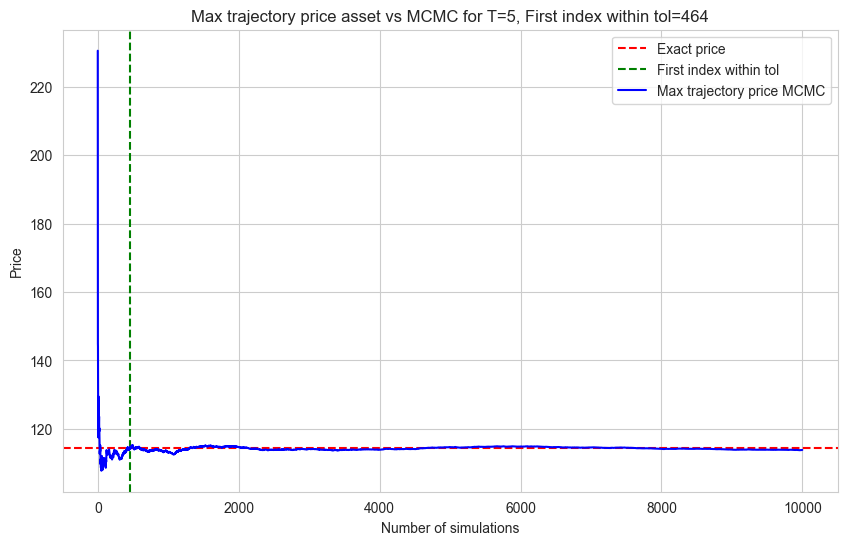

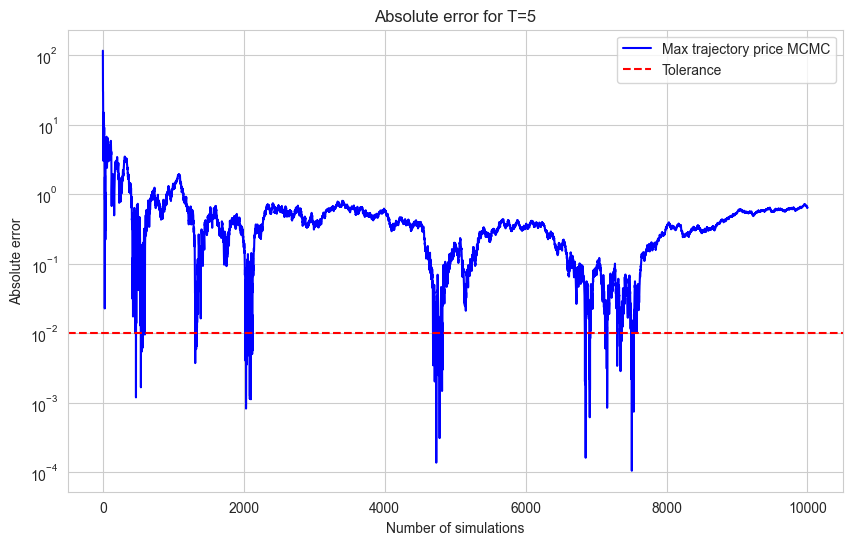

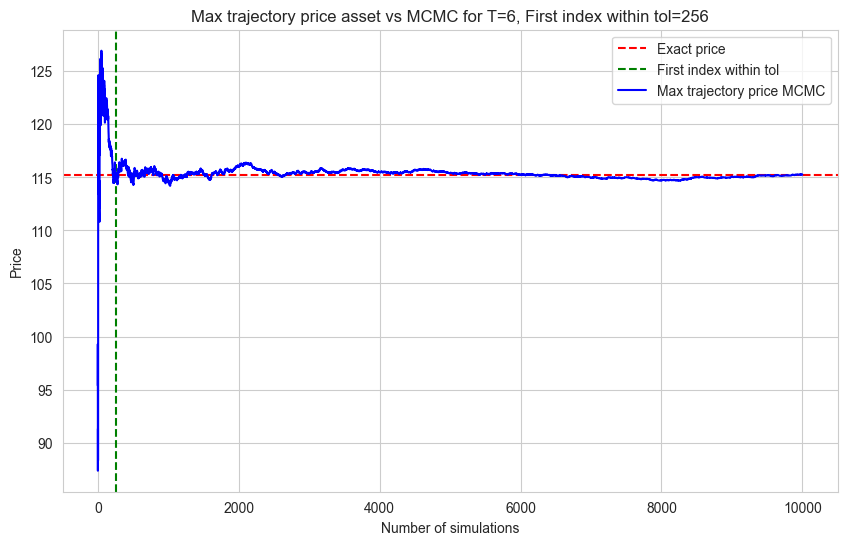

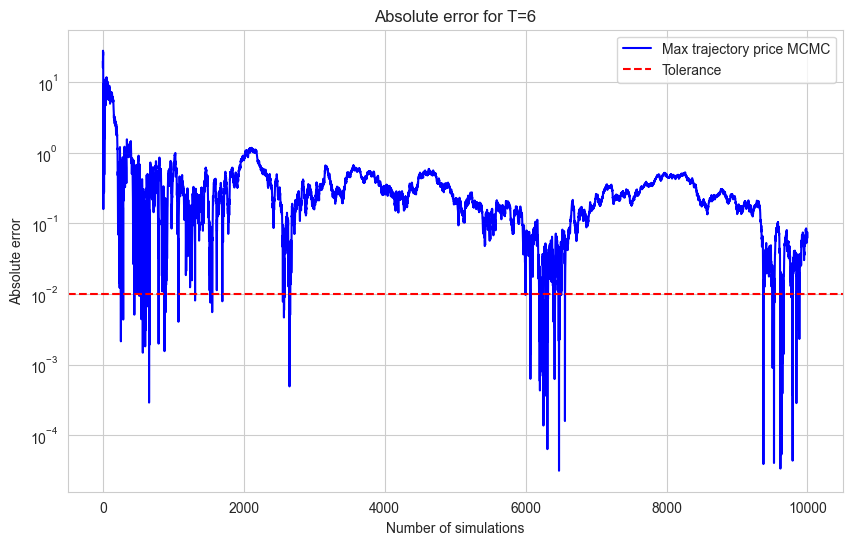

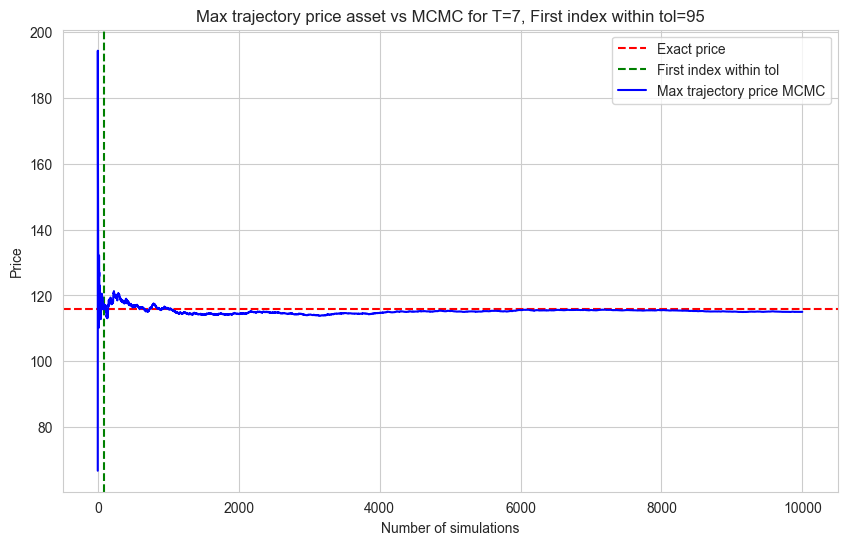

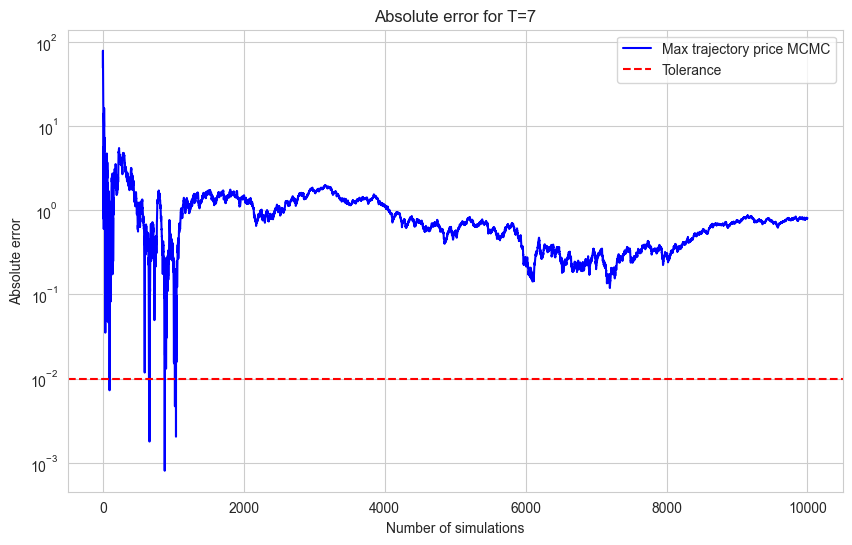

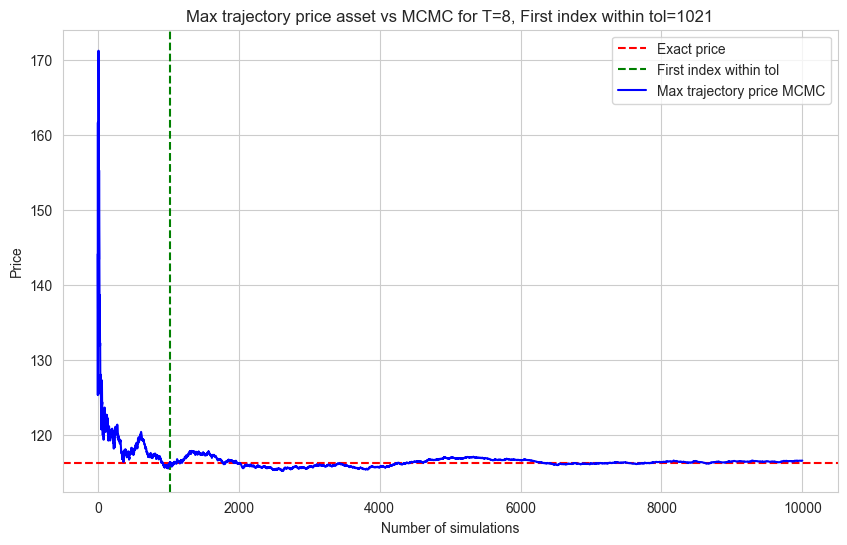

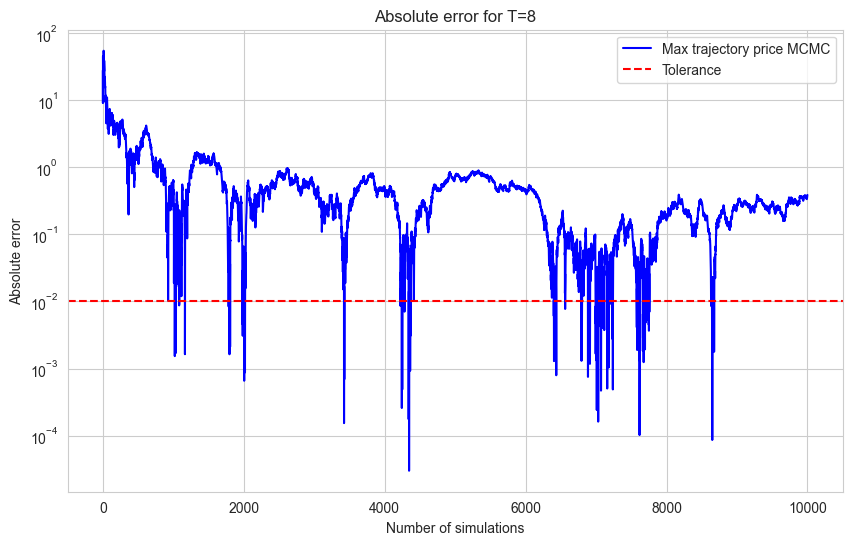

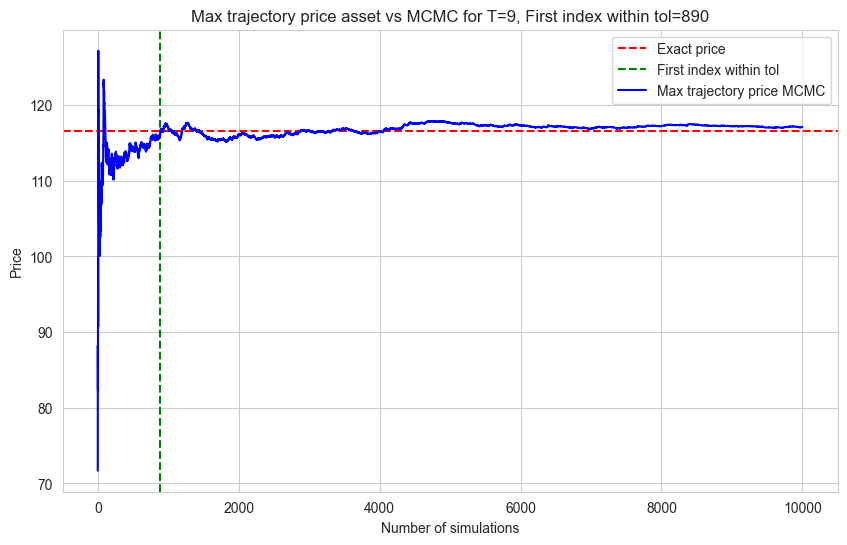

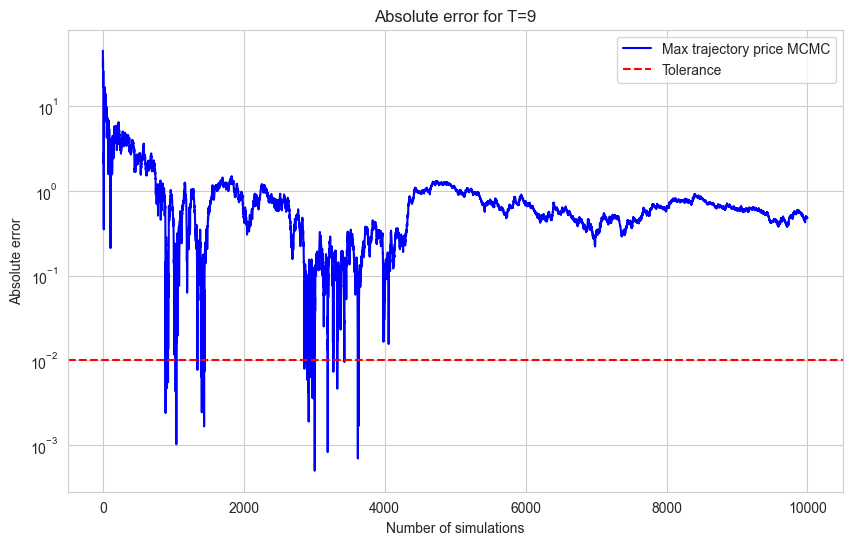

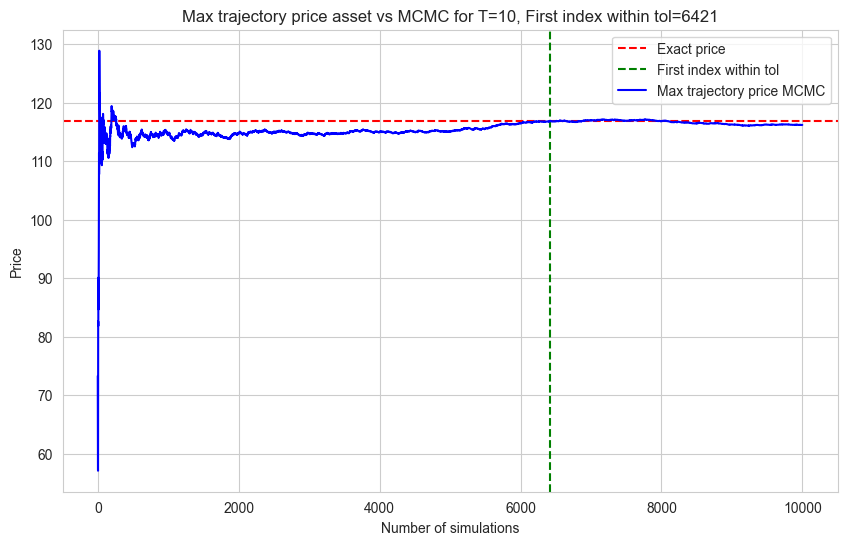

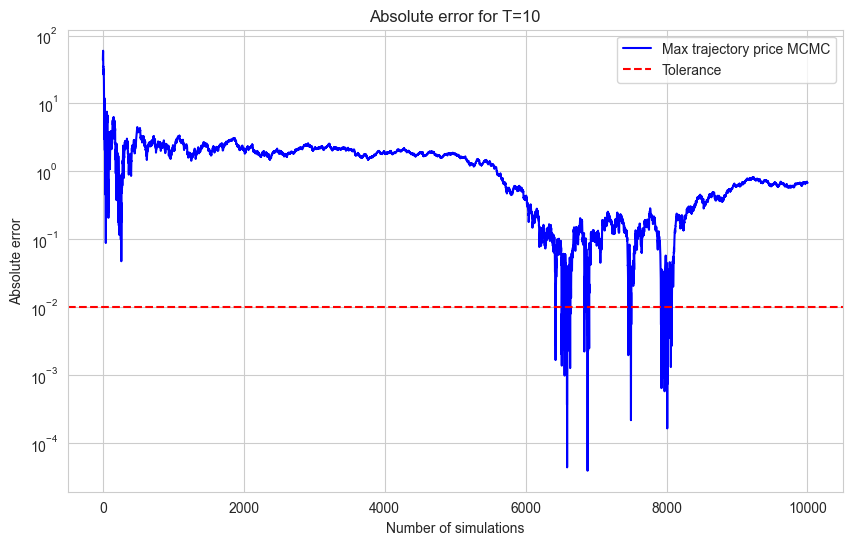

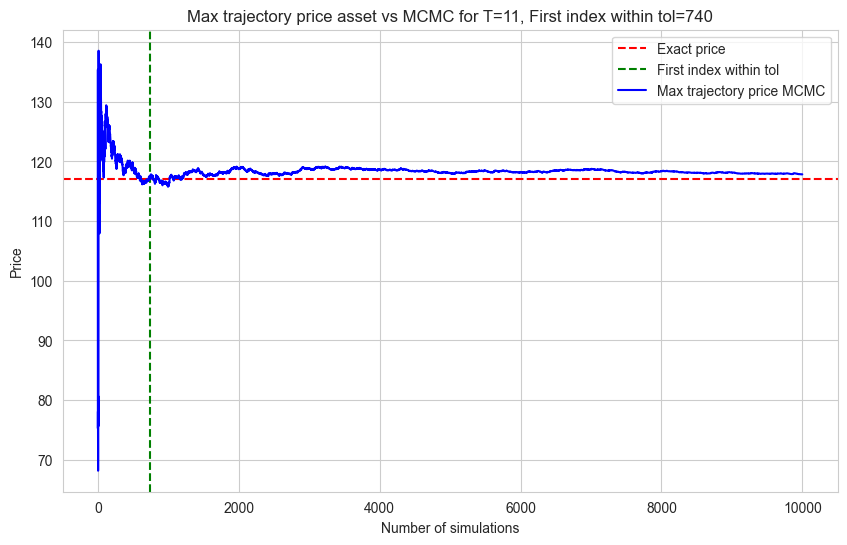

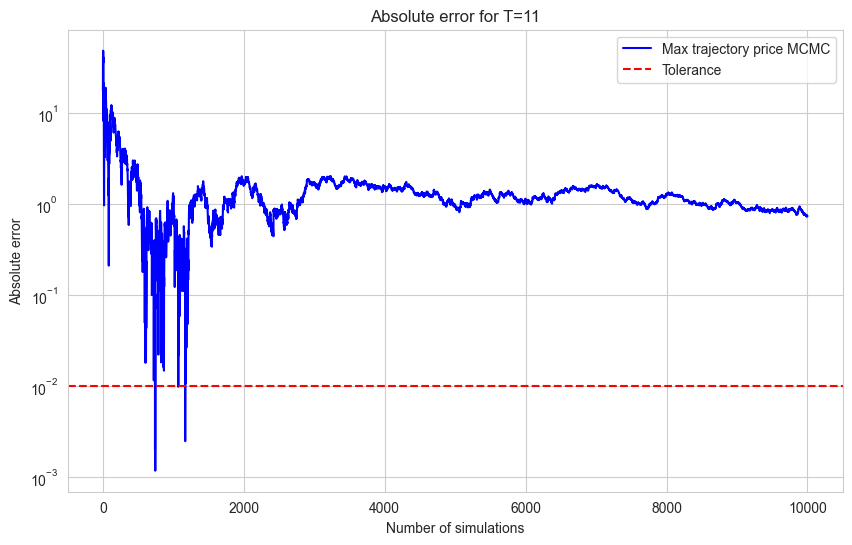

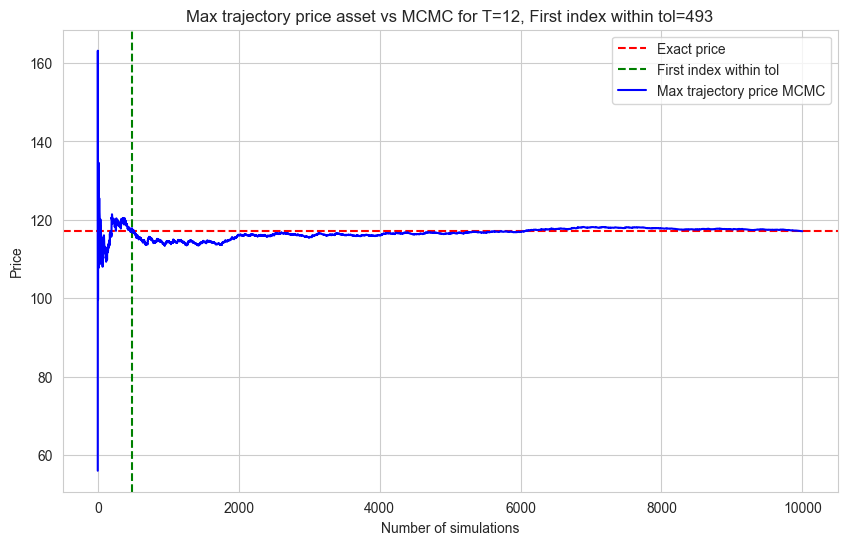

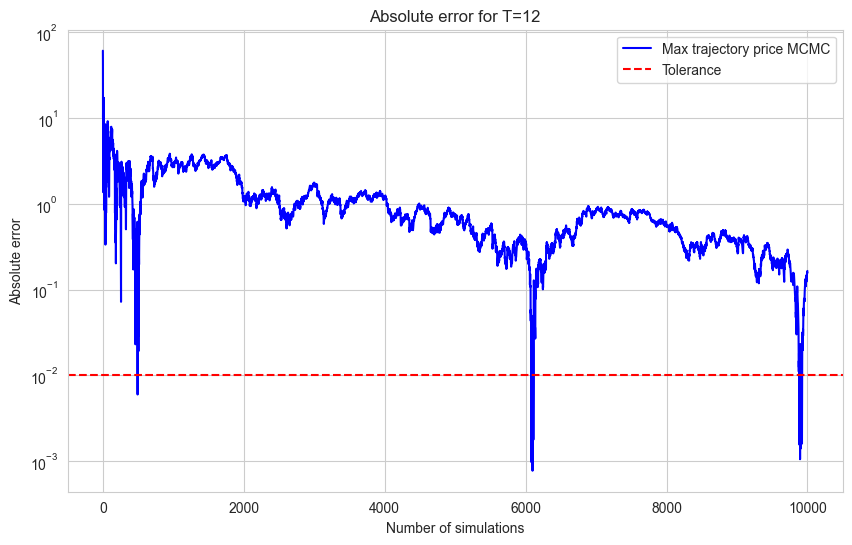

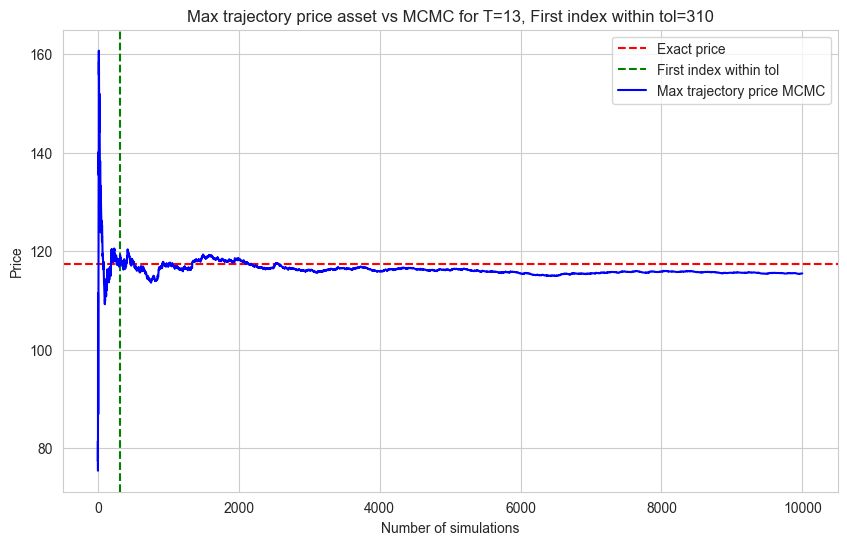

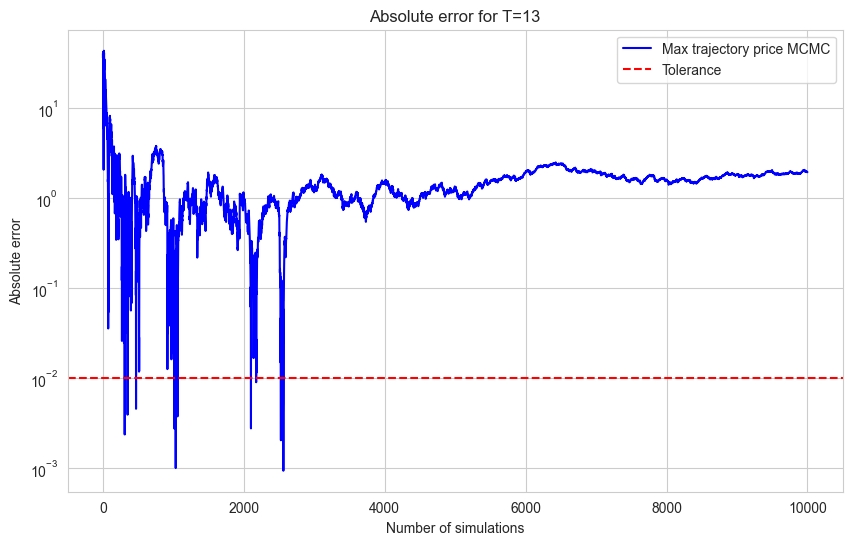

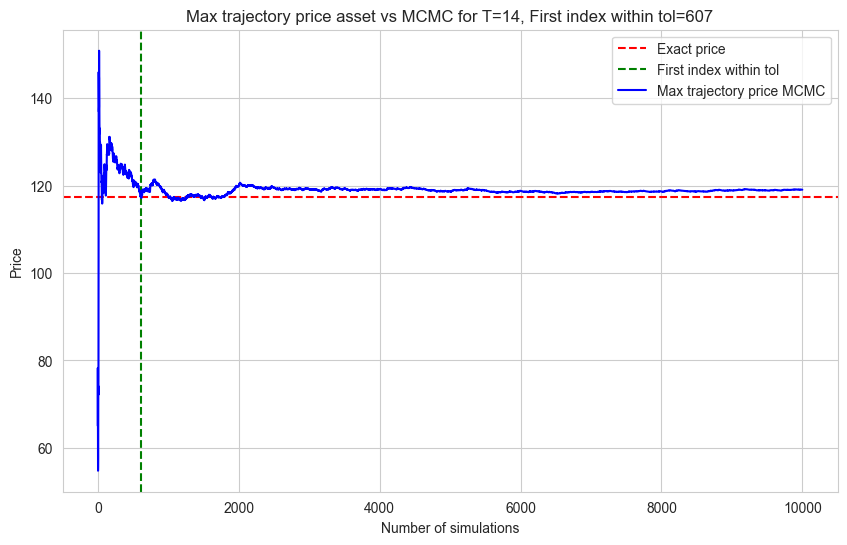

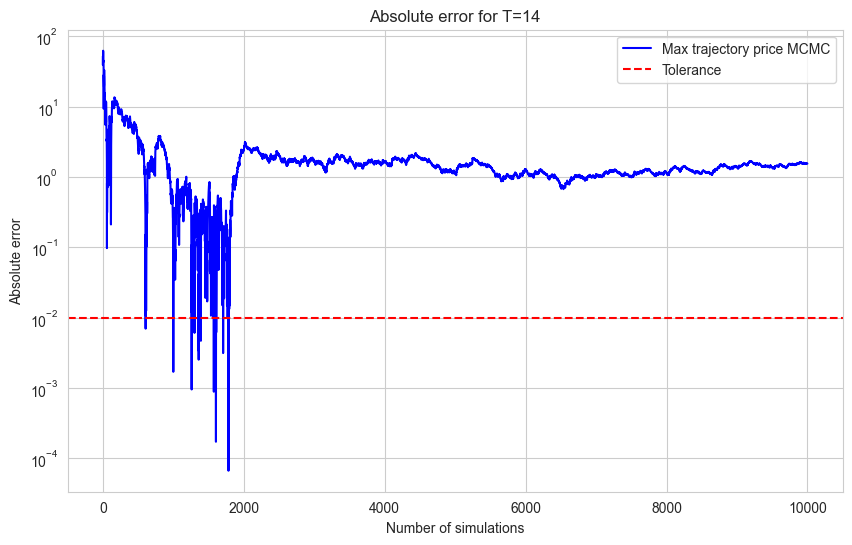

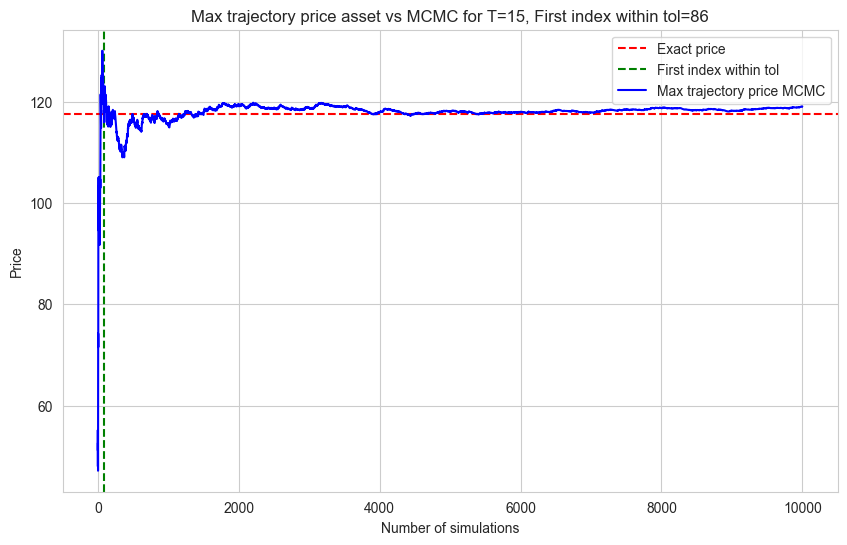

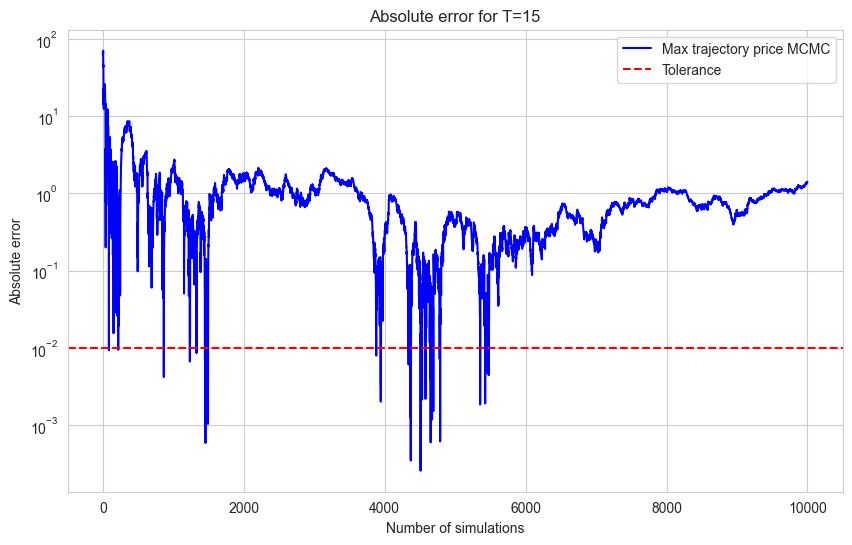

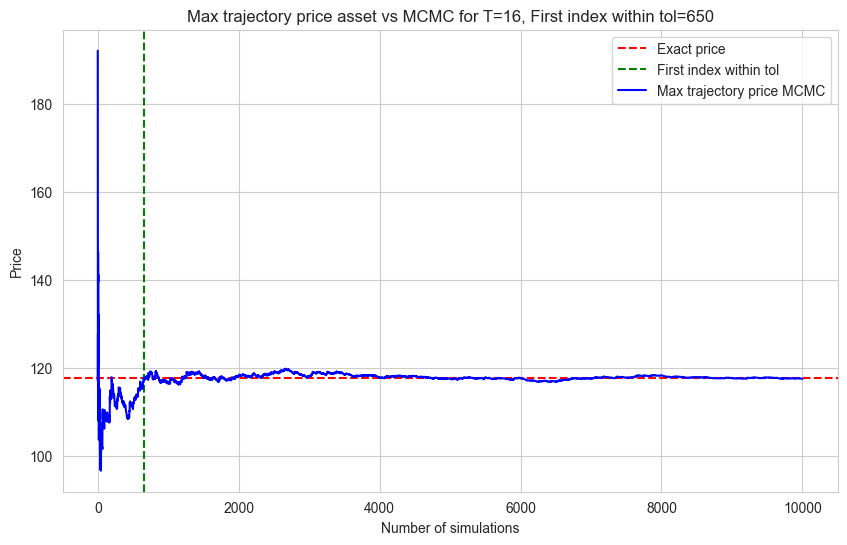

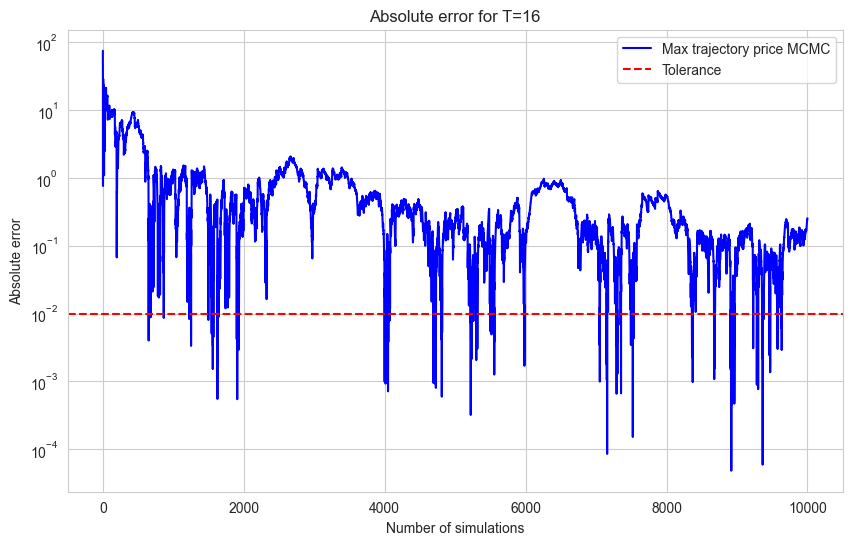

No index found within tolerance for T=17


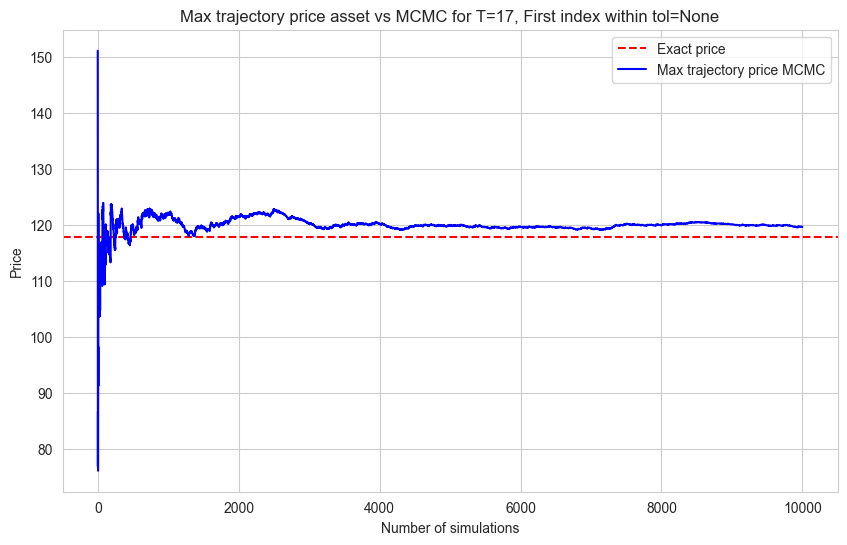

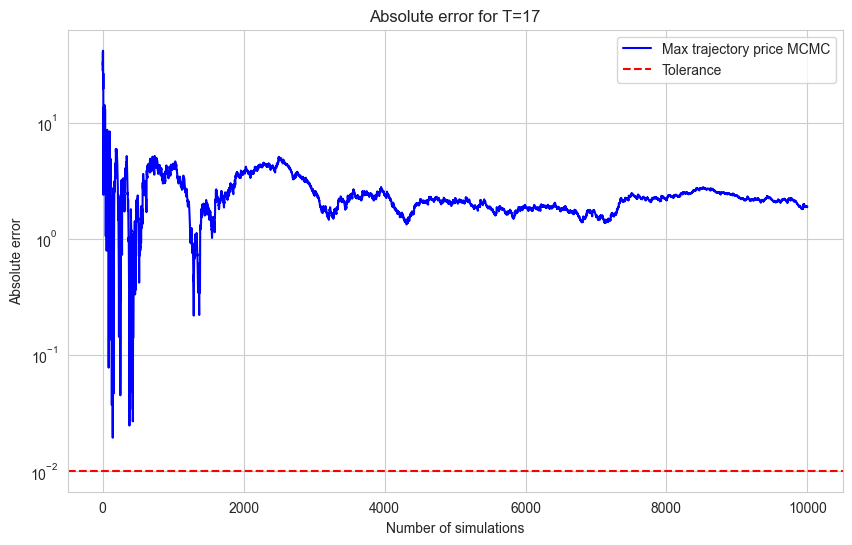

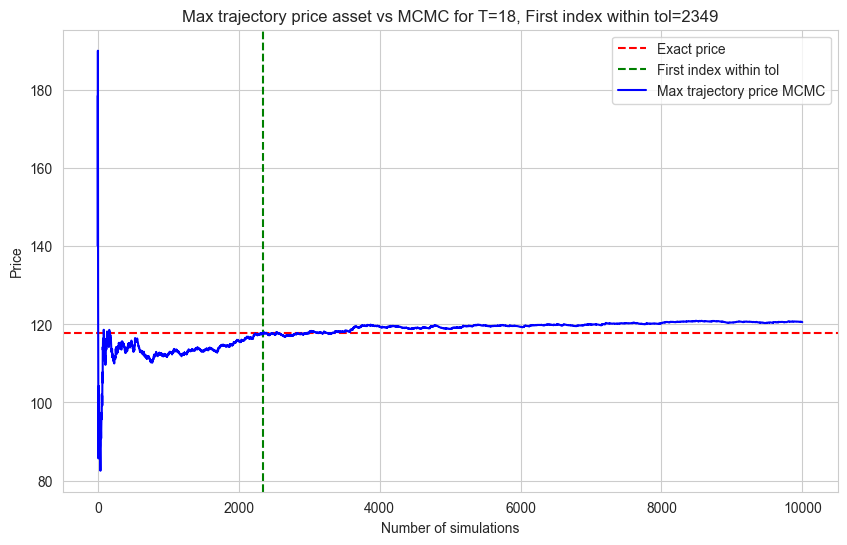

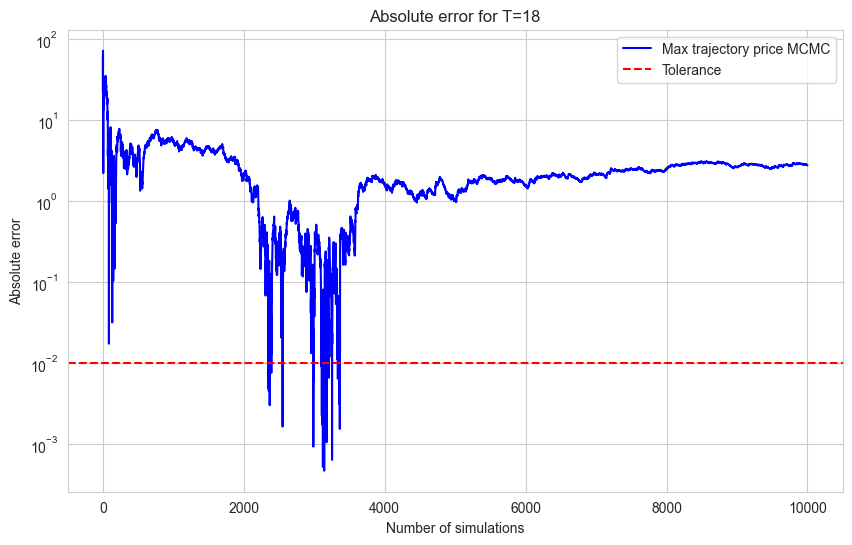

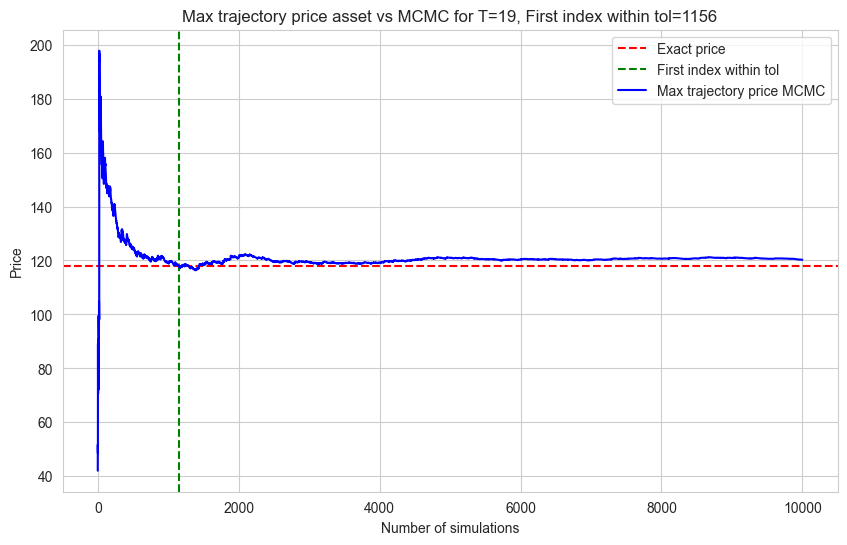

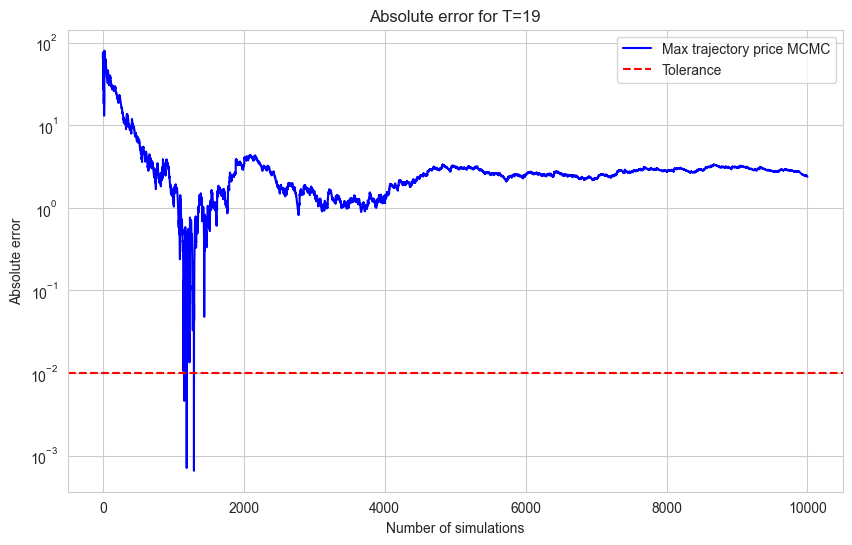

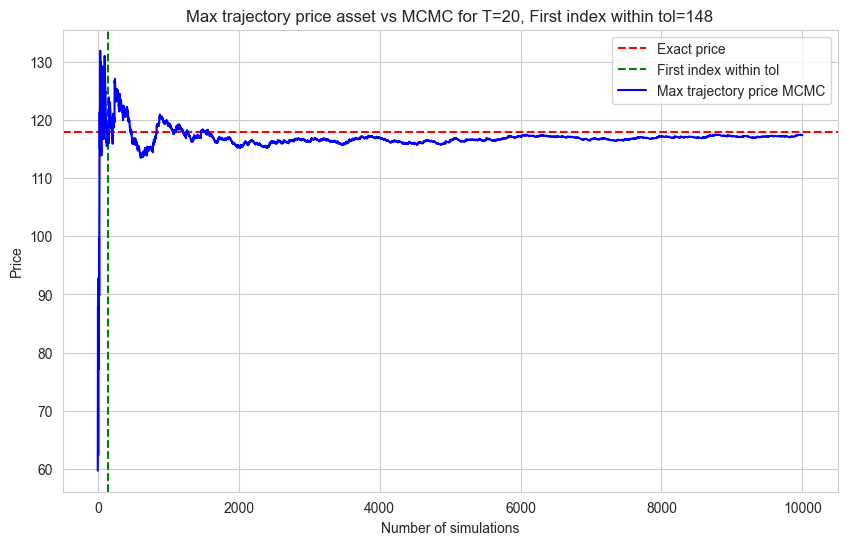

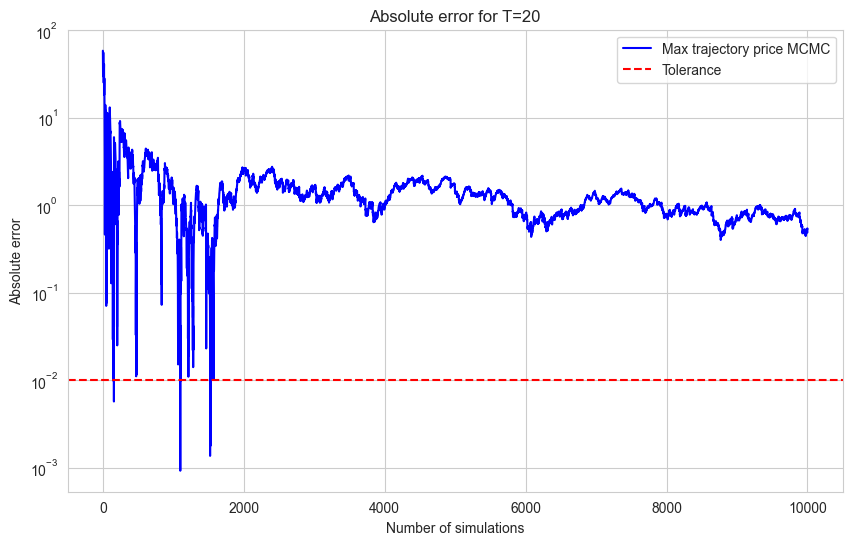

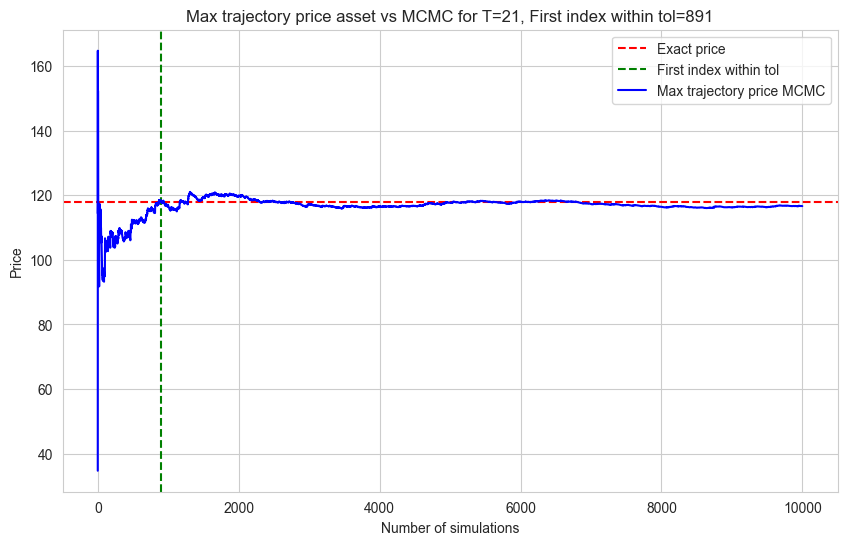

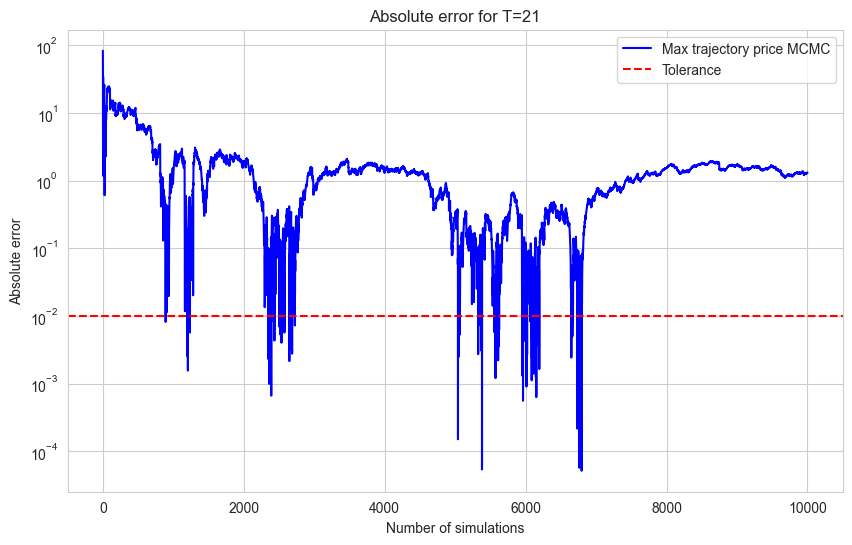

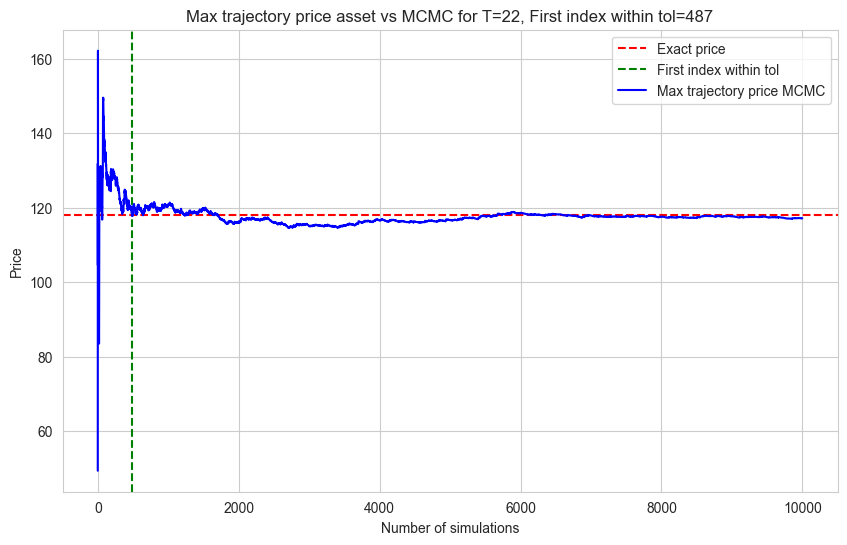

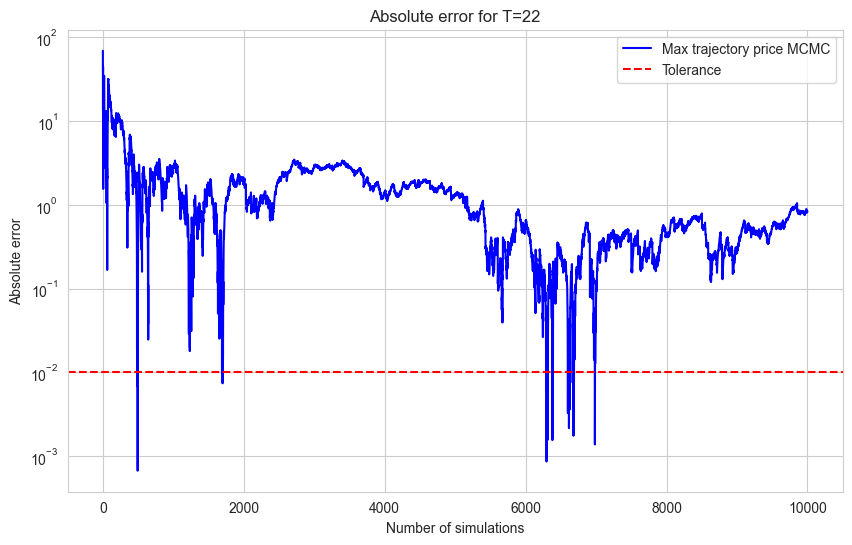

No index found within tolerance for T=23


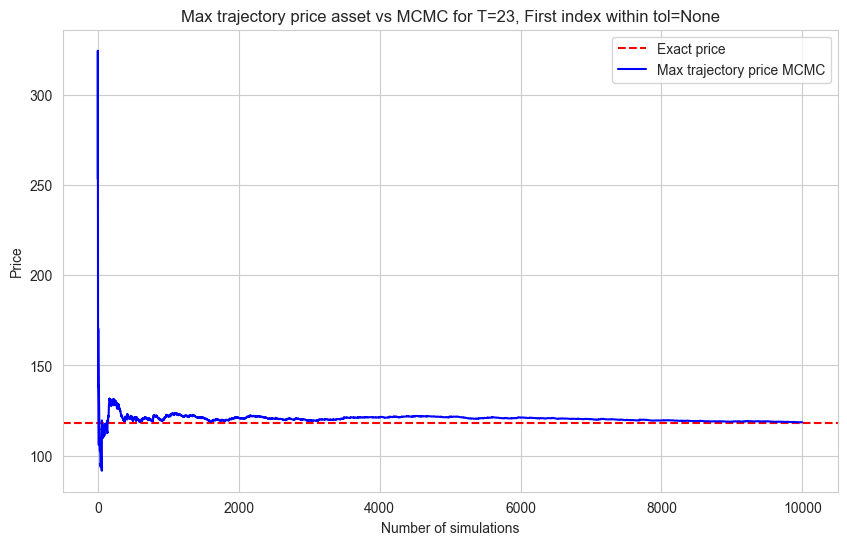

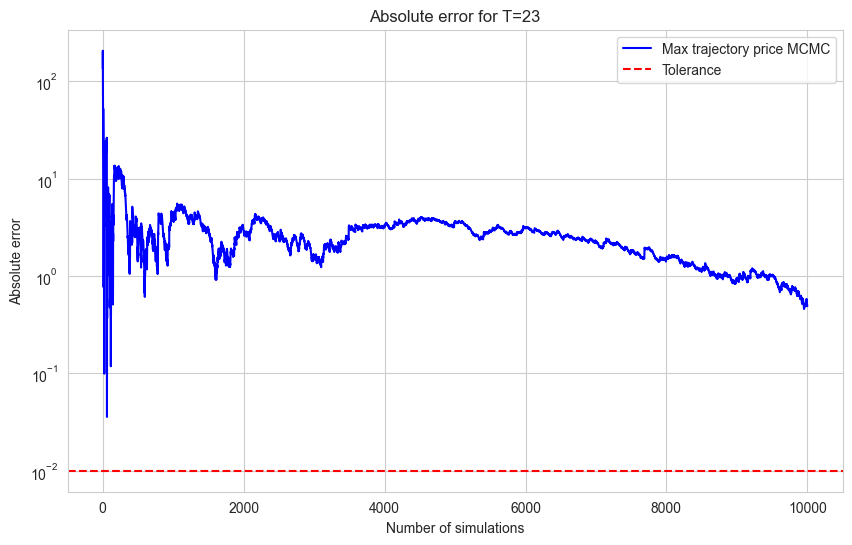

In [5]:
tol = 0.01
Ts = [i for i in range(5, 24)]
indexes = [None for _ in range(len(Ts))]
times_exact = [0 for _ in range(len(Ts))]
times_mcmc = [0 for _ in range(len(Ts))]
absolute_errors = [0 for _ in range(len(Ts))]
for index,T in enumerate(Ts):
    tree = RecombiningTree(S0, u, d, T)
    start = time.time()
    max_trajectory_price_mcmc = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
    end = time.time()
    times_mcmc[index] = end - start
    start = time.time()
    exact_price = tree.get_price_of_asset(max_trajectory)
    end = time.time()
    times_exact[index] = end - start
    absolute_errors[index] = np.abs(max_trajectory_price_mcmc[-1] - exact_price)
    plt.figure(figsize=(10, 6))
    plt.axhline(y=exact_price, color='red', linestyle='--', label='Exact price')
    try:
        index = np.where(np.abs(np.array(max_trajectory_price_mcmc) - exact_price) < tol)[0][0]
        indexes[T-11] = index
        plt.axvline(x=index, color='green', linestyle='--', label='First index within tol')
    except IndexError:
        index = None
        print(f'No index found within tolerance for T={T}')
    plt.plot(max_trajectory_price_mcmc, label='Max trajectory price MCMC', color='blue')
    plt.title(f'Max trajectory price asset vs MCMC for T={T}, First index within tol={index}')
    plt.xlabel('Number of simulations')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    #create plot with abs(max_trajectory_price_mcmc - exact_price) with log scale
    plt.figure(figsize=(10, 6))
    plt.plot(np.abs(np.array(max_trajectory_price_mcmc) - exact_price), label='Max trajectory price MCMC', color='blue')
    plt.axhline(y=tol, color='red', linestyle='--', label='Tolerance')
    plt.yscale('log')
    plt.title(f'Absolute error for T={T}')
    plt.xlabel('Number of simulations')
    plt.ylabel('Absolute error')
    plt.legend()
    plt.show()

Interpretation of the results:
If T is small, Monte Carlo simulation is not needed, as the exact price can be calculated easily.
When T is large, Monte Carlo simulation becomes really useful, but the exact price is not easy to calculate, taking a lot of time.
Monte Carlo often needs only around 10000 simulations to be within $1 from the exact price even for huge T like T=22. To calculate the exact price for T=22, we need to calculate 2^22 = 4194304 paths :O

## 2.2.4 and 2.2.5

In [6]:
T = 11
print("Small T={}".format(T))
tree = RecombiningTree(S0, u, d, T)
start = time.time()
mcmc_price = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
end = time.time()
print(f'Time for MCMC: {end - start} seconds')
start = time.time()
exact_price = tree.get_price_of_asset(max_trajectory)
end = time.time()
print(f'Time for exact: {end - start} seconds')
print(f'MCMC price: {mcmc_price[-1]} vs exact price: {exact_price}')

Small T=11
Time for MCMC: 0.38306093215942383 seconds
Time for exact: 0.0008587837219238281 seconds
MCMC price: 116.2927001428935 vs exact price: 117.0875171014087


In [7]:
T=23
print("Large T={}".format(T))
tree = RecombiningTree(S0, u, d, T)
start = time.time()
mcmc_price = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
end = time.time()
print(f'Time for MCMC: {end - start} seconds')
start = time.time()
exact_price = tree.get_price_of_asset(max_trajectory)
end = time.time()
print(f'Time for exact: {end - start} seconds')
print(f'MCMC price: {mcmc_price[-1]} vs exact price: {exact_price}')
print(f'Number of paths for T=22: {2**T} and MCMC: 10000')

Large T=23
Time for MCMC: 0.4313688278198242 seconds
Time for exact: 4.241586923599243 seconds
MCMC price: 116.44017795505009 vs exact price: 117.97218766641244
Number of paths for T=22: 8388608 and MCMC: 10000


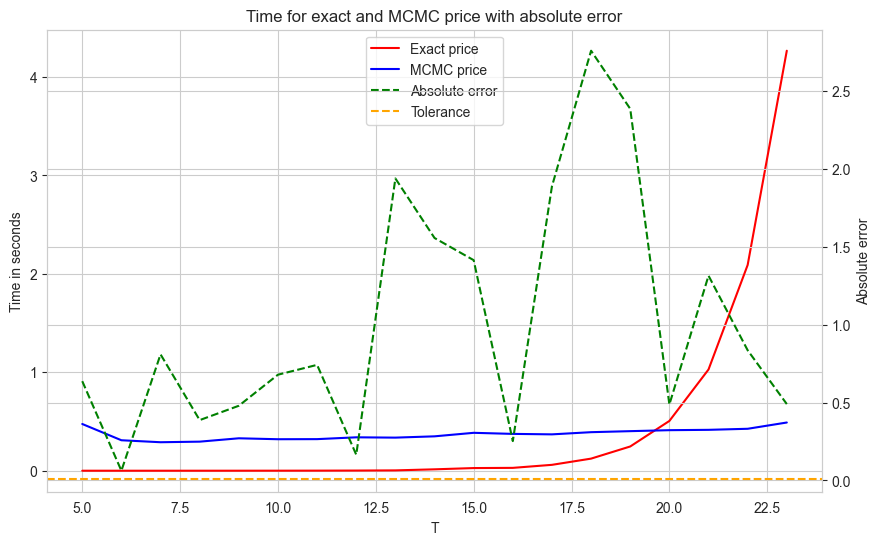

In [8]:
# Plotting times for exact and MCMC with absolute error on a different scale
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot times for exact and MCMC
ax1.plot(Ts, times_exact, label='Exact price', color='red')
ax1.plot(Ts, times_mcmc, label='MCMC price', color='blue')
ax1.set_xlabel('T')
ax1.set_ylabel('Time in seconds')
ax1.set_title('Time for exact and MCMC price with absolute error')
ax1.legend(loc='upper left')

# Create a secondary y-axis for absolute error
ax2 = ax1.twinx()
ax2.plot(Ts, absolute_errors, label='Absolute error', color='green', linestyle='--')
ax2.set_ylabel('Absolute error')
ax2.axhline(y=tol, color='orange', linestyle='--', label='Tolerance')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center')

plt.show()

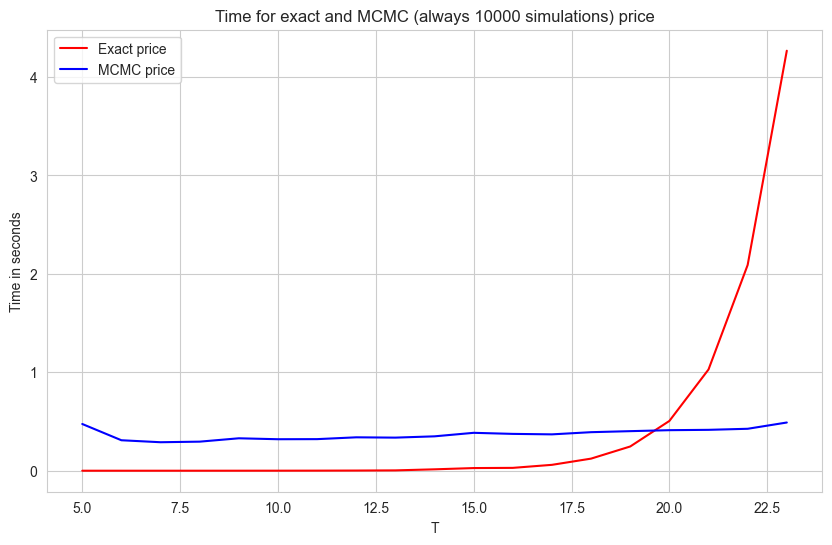

In [9]:
#ploting times for exact and mcmc
plt.figure(figsize=(10, 6))
plt.plot(Ts, times_exact, label='Exact price', color='red')
plt.plot(Ts, times_mcmc, label='MCMC price', color='blue')
plt.title('Time for exact and MCMC (always 10000 simulations) price')
plt.xlabel('T')
plt.ylabel('Time in seconds')
plt.legend()
plt.show()

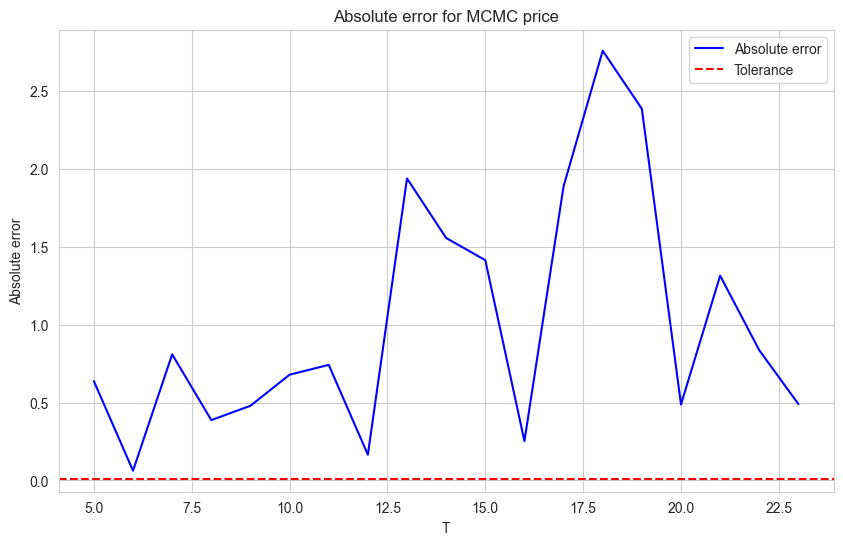

In [10]:
#plotting absolute errors
plt.figure(figsize=(10, 6))
plt.plot(Ts, absolute_errors, label='Absolute error', color='blue')
plt.axhline(y=tol, color='red', linestyle='--', label='Tolerance')
plt.title('Absolute error for MCMC price')
plt.xlabel('T')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

### 2.2.5

In [11]:
T=50
print("Huge T={}".format(T))
tree = RecombiningTree(S0, u, d, T)
start = time.time()
mcmc_price = tree.get_price_of_asset_mc(func=max_trajectory, n=100_000)
end = time.time()
print(f'Time for MCMC: {end - start} seconds')
print(f'MCMC price: {mcmc_price[-1]}')
#without exact price, as it would take too long

Huge T=50
Time for MCMC: 26.52707600593567 seconds
MCMC price: 118.30996758571604


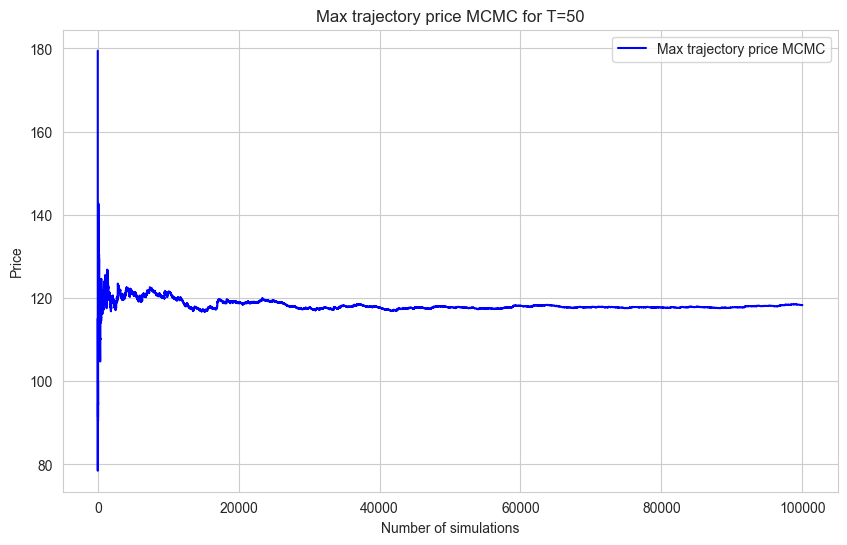

In [12]:
#plots
plt.figure(figsize=(10, 6))
plt.plot(mcmc_price, label='Max trajectory price MCMC', color='blue')
plt.title(f'Max trajectory price MCMC for T={T}')
plt.xlabel('Number of simulations')
plt.ylabel('Price')
plt.legend()
plt.show()

## 2.3

### Default

In [13]:
S0 = 100
u = 1.3
d = 0.8
steps = 22

In [14]:
market = RecombiningTree(S0, u, d, steps)
start = time.time()
max_trajectory_price_asset_mc = market.get_price_of_asset_mc(max_trajectory,100_000)
end = time.time()
print(f'Time for exact: {end - start} seconds')
print(f'Price: {max_trajectory_price_asset_mc[-1]}')

Time for exact: 22.742435216903687 seconds
Price: 118.33668533764954


### Numpy

In [15]:
start = time.time()
price = market.get_price_of_asset_mc_numpy(max_trajectory, 100_000)
end = time.time()
print(f'Time for numpy: {end - start} seconds')
print(f'Price: {price[-1]}')

Time for numpy: 2.0833897590637207 seconds
Price: 118.03370958620201


### Parallel

In [16]:
start = time.time() 
price = market.get_price_of_asset_mc_parallel(max_trajectory, 100_000)
end = time.time()
print(f'Time for parallel: {end - start} seconds')
print(f'Price: {price[-1]}')

Time for parallel: 1.562621831893921 seconds
Price: 117.58605860476254


### Cython

In [17]:
%load_ext cython

In [18]:
%%cython
import numpy as np
cimport numpy as np
from libc.math cimport pow
from time import time

cdef class MonteCarloPricer:
    cdef double r, p, u, d
    cdef int steps
    cdef double S0

    def __init__(self, double r, double p, double u, double d, int steps, double S0):
        self.r = r
        self.p = p
        self.u = u
        self.d = d
        self.steps = steps
        self.S0 = S0

    cpdef double _evaluate_mc(self, func, int n, list trajectory=None, int t=0):
        if trajectory is None:
            trajectory = [self.S0]
        if t == self.steps:
            return func(trajectory)
        cdef double u_rand = np.random.uniform(0, 1)
        if u_rand < self.p:
            return self._evaluate_mc(func, n, trajectory + [self.u * trajectory[-1]], t + 1)
        else:
            return self._evaluate_mc(func, n, trajectory + [self.d * trajectory[-1]], t + 1)

    cpdef list get_price_of_asset_mc(self, func, int n):
        cdef int i
        cdef double discount = pow(1 + self.r, self.steps)
        prices = [self._evaluate_mc(func, n) for i in range(n)]
        sum_mc = [sum(prices[:i + 1]) / (discount * (i + 1)) for i in range(n)]
        return sum_mc
def payoff_max(traj):
    return max(traj)

r = 0.1
u = 1.3
d = 0.8
steps = 22
S0 = 100
n = 100_000
p = (1 + r - d) / (u - d)

pricer = MonteCarloPricer(r, p, u, d, steps, S0)

t0 = time()
result = pricer.get_price_of_asset_mc(payoff_max, n)
t1 = time()
print("")
print(f"Price: {result[-1]:.4f}")
print(f"Time: {t1 - t0:.4f} sekund")

Content of stderr:
In file included from /Users/fantasy2fry/.cache/ipython/cython/_cython_magic_047ac6ffb95dcc08cef7b573489d95c94bd16004.c:1250:
In file included from /opt/homebrew/lib/python3.11/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/homebrew/lib/python3.11/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/homebrew/lib/python3.11/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/opt/homebrew/lib/python3.11/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/fantasy2fry/.cache/ipython/cython/_cython_magic_047ac6ffb95dcc08cef7b573489d95c94bd16004.c:9755:26: warning: code will never be executed [-Wunreachable-code]
                module = PyImport_ImportModuleLevelObject(
            

### Summary
I've somehow managed to implement the Parallel and Cython versions of the code. Yey!

| Implementation | Time (s) |
|----------------|----------|
| Default        | 22.74    |
| Numpy          | 2.08     |
| Parallel       | 1.56     |
| Cython         | 20.88    |

As we can see, the Cython implementation is not faster than the numpy implementation. The Best implementation is the parallel one. Numpy seems really powerful!

# Additional

No index found within tolerance for T=6
No index found within tolerance for T=9
No index found within tolerance for T=11


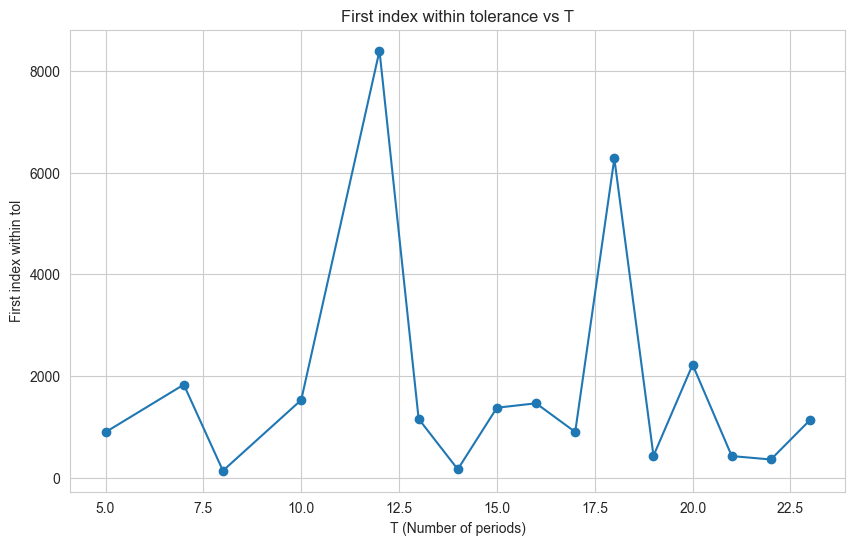

In [4]:
tol = 0.01
Ts = [i for i in range(5, 24)]
indexes = [None for _ in range(len(Ts))]

for i, T in enumerate(Ts):
    tree = RecombiningTree(S0, u, d, T)
    max_trajectory_price_mcmc = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
    exact_price = tree.get_price_of_asset(max_trajectory)
    try:
        index = np.where(np.abs(np.array(max_trajectory_price_mcmc) - exact_price) < tol)[0][0]
        indexes[i] = index
    except IndexError:
        print(f'No index found within tolerance for T={T}')
        indexes[i] = None

# Usuwamy wartości None, by nie psuły wykresu
filtered_Ts = [T for T, idx in zip(Ts, indexes) if idx is not None]
filtered_indexes = [idx for idx in indexes if idx is not None]

plt.figure(figsize=(10, 6))
plt.plot(filtered_Ts, filtered_indexes, marker='o')
plt.title('First index within tolerance vs T')
plt.xlabel('T (Number of periods)')
plt.ylabel('First index within tol')
plt.grid(True)
plt.show()


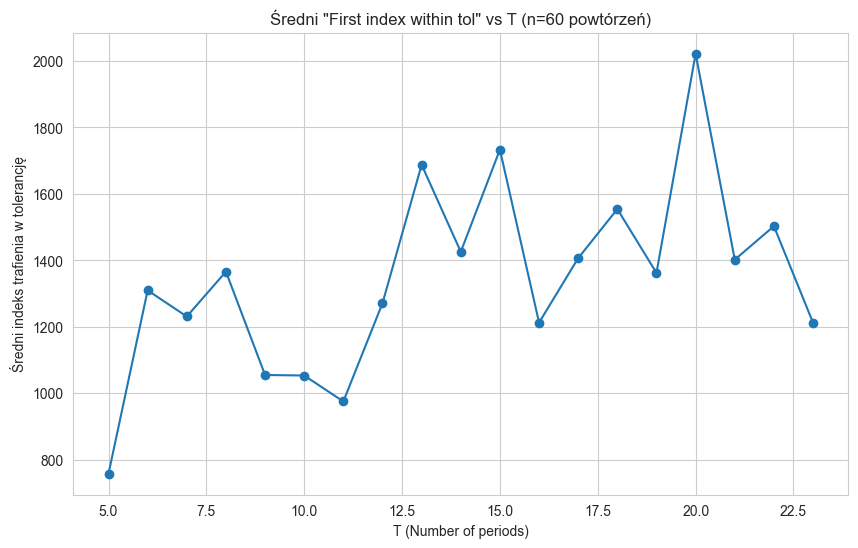

In [8]:
tol = 0.01
Ts = [i for i in range(5, 24)]
n_simulations = 60  # liczba powtórzeń dla każdego T
indexes_avg = []

for T in Ts:
    indexes_for_T = []
    tree = RecombiningTree(S0, u, d, T)
    exact_price = tree.get_price_of_asset(max_trajectory)

    for _ in range(n_simulations):
        max_trajectory_price_mcmc = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
        try:
            idx = np.where(np.abs(np.array(max_trajectory_price_mcmc) - exact_price) < tol)[0][0]
            indexes_for_T.append(idx)
        except IndexError:
            pass  # Pomijamy, jeśli brak trafienia

    if indexes_for_T:
        indexes_avg.append(np.mean(indexes_for_T))
    else:
        indexes_avg.append(None)
        print(f'No index within tolerance for T={T} in any of the {n_simulations} runs')

# Usunięcie None z wyników
filtered_Ts = [T for T, idx in zip(Ts, indexes_avg) if idx is not None]
filtered_indexes_avg = [idx for idx in indexes_avg if idx is not None]

plt.figure(figsize=(10, 6))
plt.plot(filtered_Ts, filtered_indexes_avg, marker='o')
plt.title(f'Średni "First index within tol" vs T (n={n_simulations} powtórzeń)')
plt.xlabel('T (Number of periods)')
plt.ylabel('Średni indeks trafienia w tolerancję')
plt.grid(True)
plt.show()


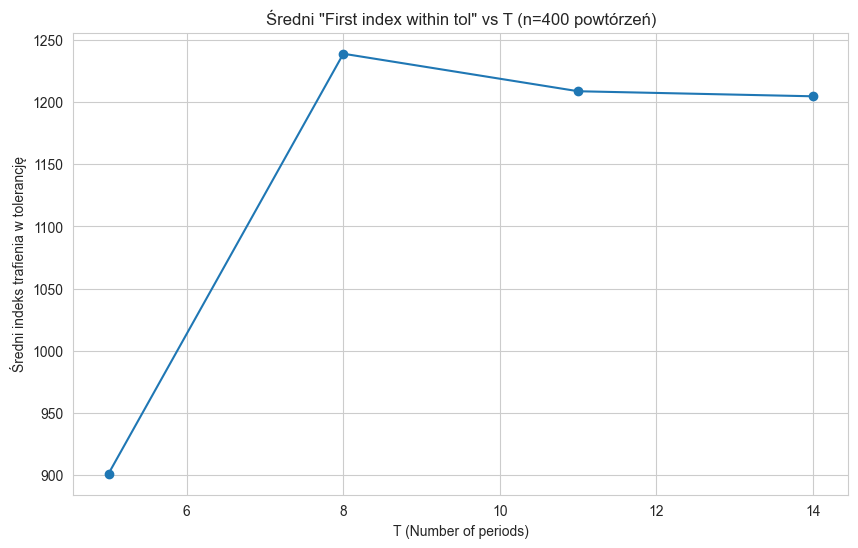

In [10]:
tol = 0.01
Ts = [i for i in range(5, 16, 3)]
n_simulations = 400  # liczba powtórzeń dla każdego T
indexes_avg = []

for T in Ts:
    indexes_for_T = []
    tree = RecombiningTree(S0, u, d, T)
    exact_price = tree.get_price_of_asset(max_trajectory)

    for _ in range(n_simulations):
        max_trajectory_price_mcmc = tree.get_price_of_asset_mc(func=max_trajectory, n=10_000)
        try:
            idx = np.where(np.abs(np.array(max_trajectory_price_mcmc) - exact_price) < tol)[0][0]
            indexes_for_T.append(idx)
        except IndexError:
            pass  # Pomijamy, jeśli brak trafienia

    if indexes_for_T:
        indexes_avg.append(np.mean(indexes_for_T))
    else:
        indexes_avg.append(None)
        print(f'No index within tolerance for T={T} in any of the {n_simulations} runs')

# Usunięcie None z wyników
filtered_Ts = [T for T, idx in zip(Ts, indexes_avg) if idx is not None]
filtered_indexes_avg = [idx for idx in indexes_avg if idx is not None]

plt.figure(figsize=(10, 6))
plt.plot(filtered_Ts, filtered_indexes_avg, marker='o')
plt.title(f'Średni "First index within tol" vs T (n={n_simulations} powtórzeń)')
plt.xlabel('T (Number of periods)')
plt.ylabel('Średni indeks trafienia w tolerancję')
plt.grid(True)
plt.show()
